In [ ]:
14 april

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.5 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-3-2b26a88272a0>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




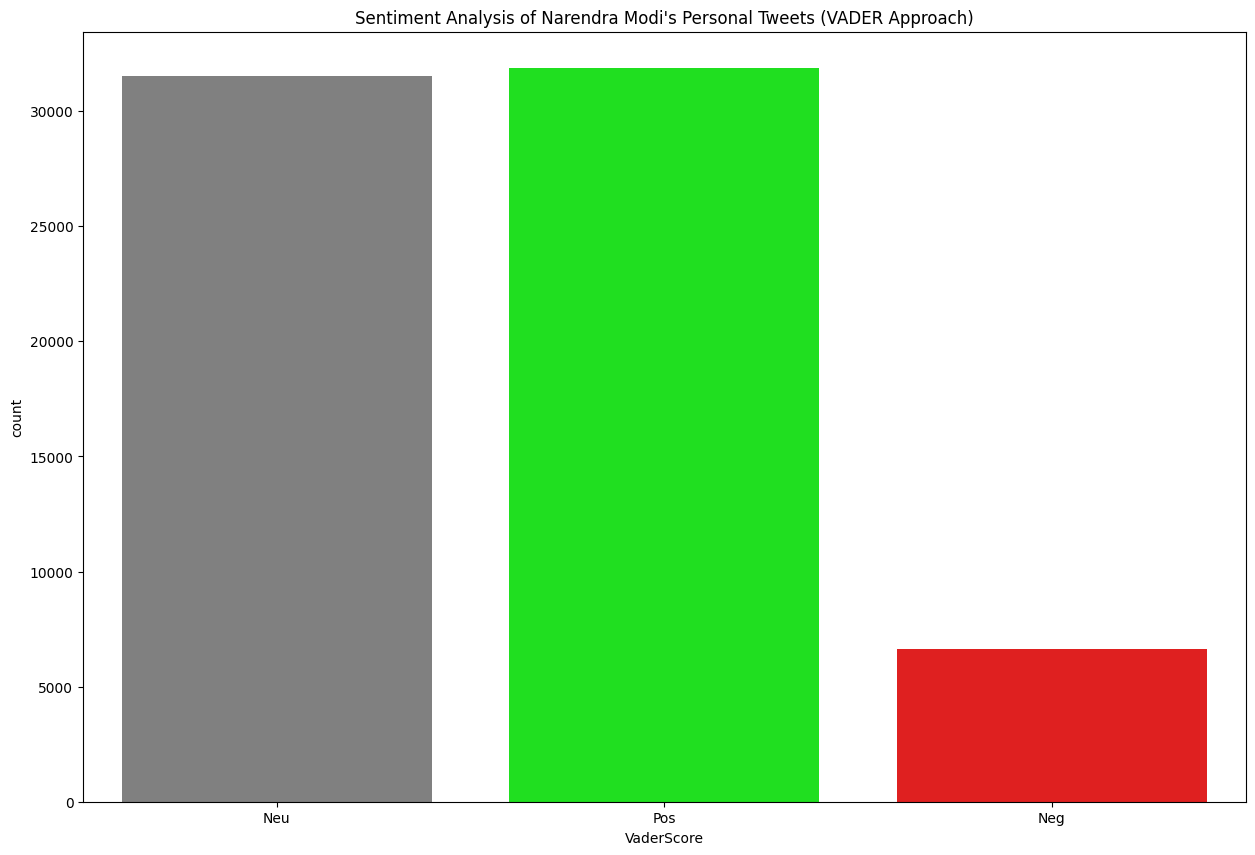

<ipython-input-3-2b26a88272a0>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




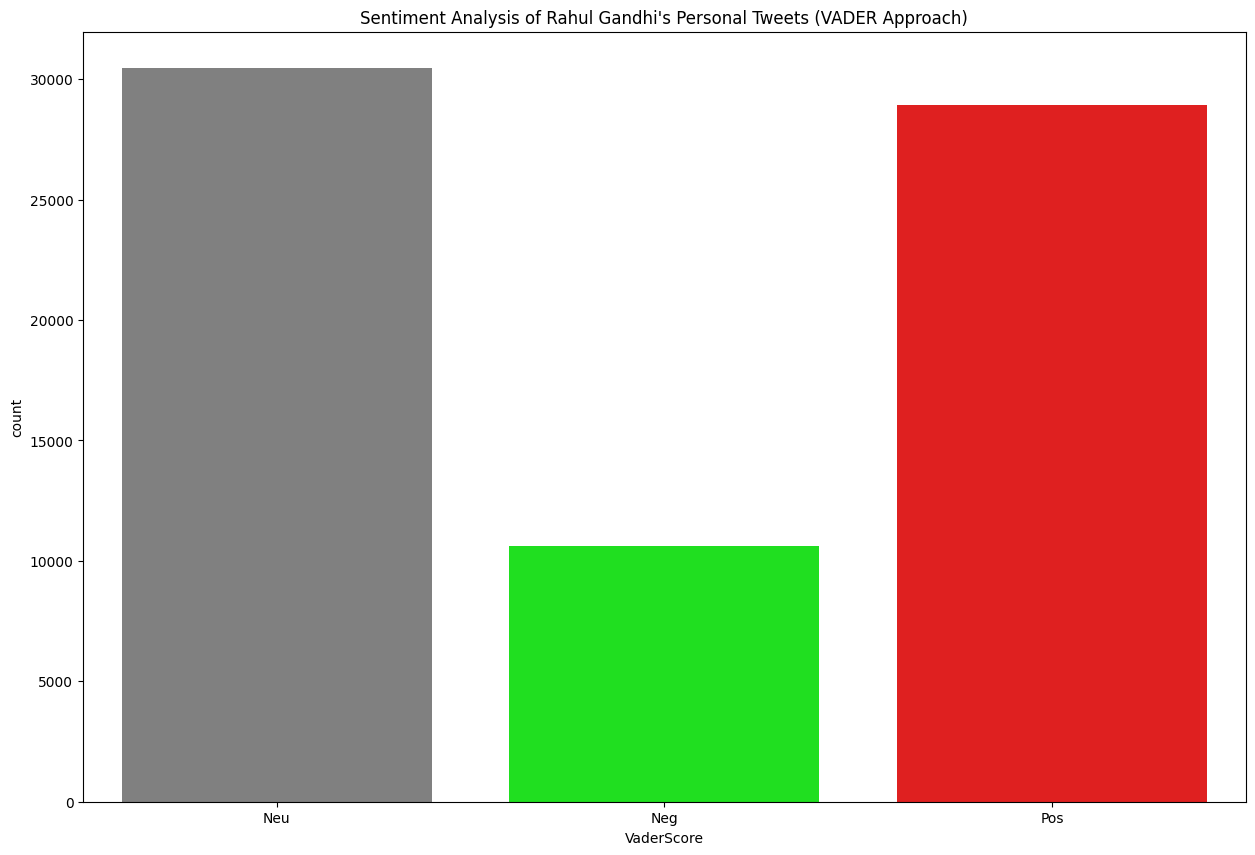

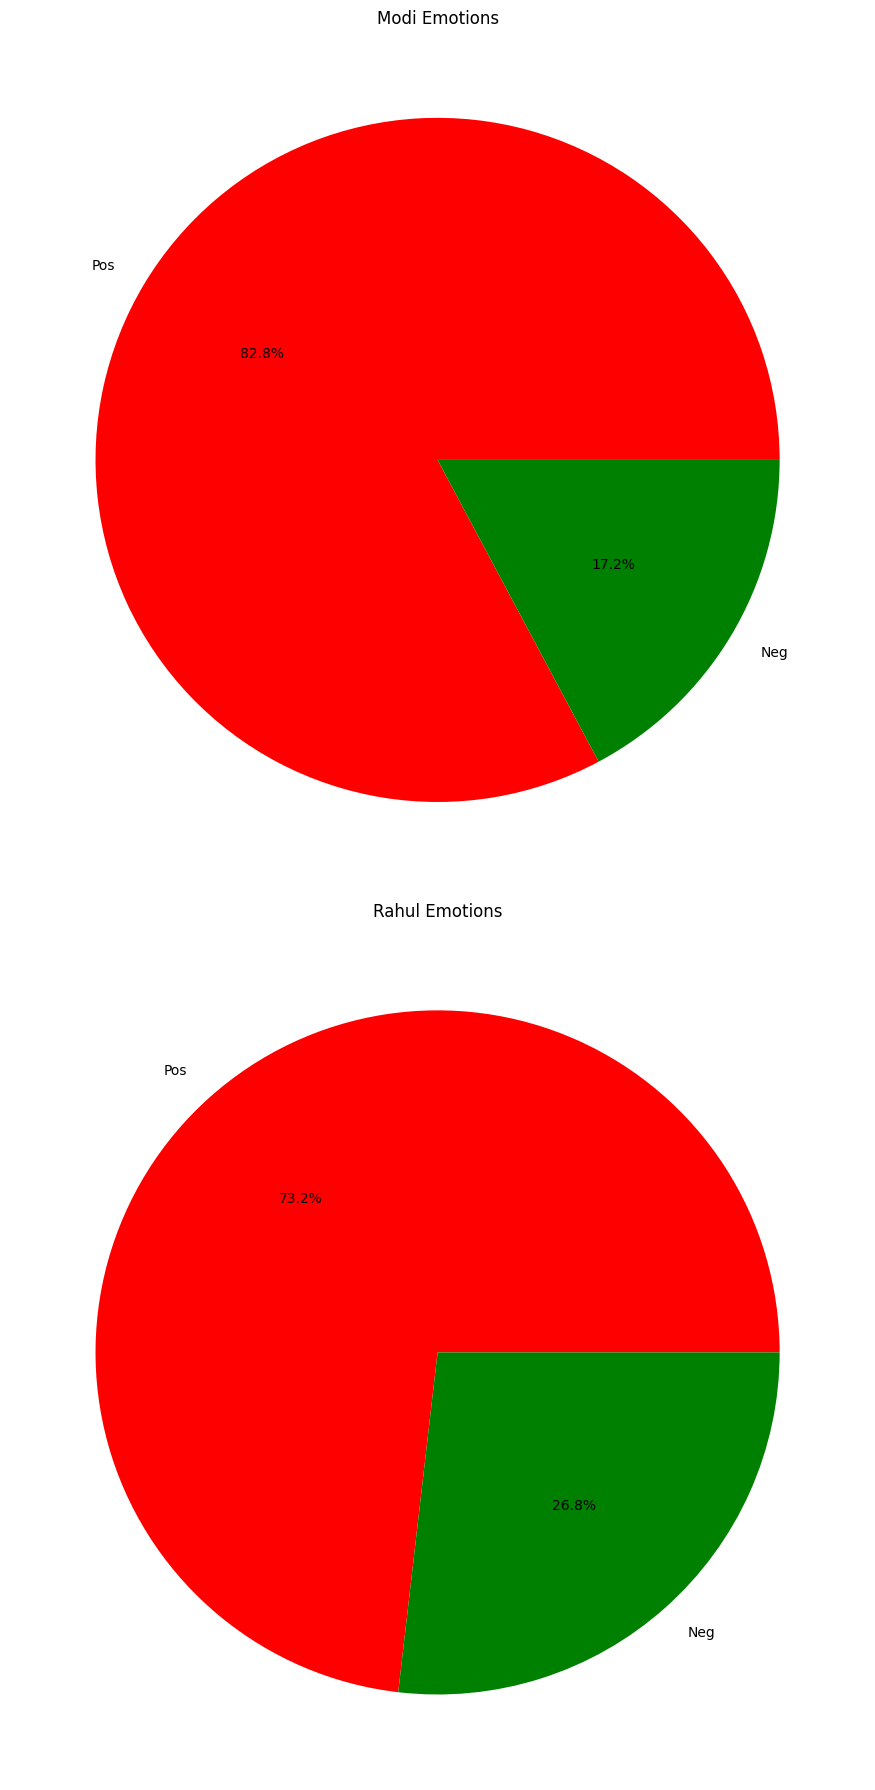

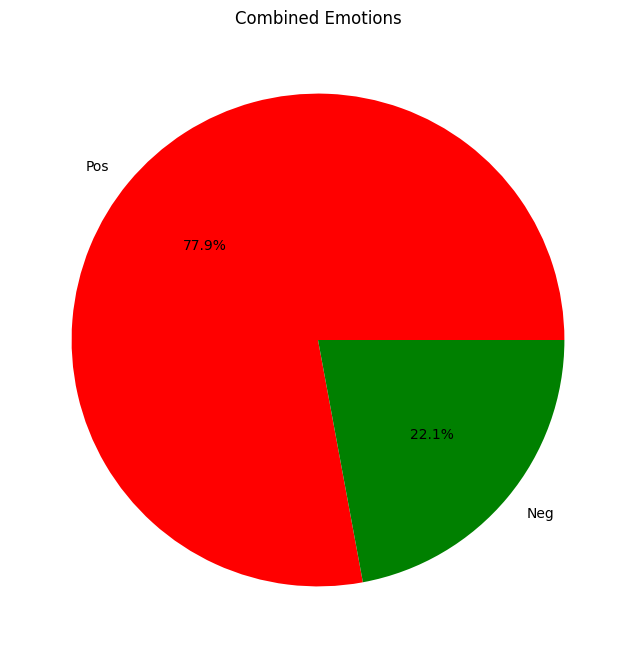

The predicted winning politician based on net sentiment score is: Narendra Modi


In [ ]:
!pip install vaderSentiment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS



# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Read the datasets from Google Drive
df_Modi = pd.read_csv('/content/Narendra Modi_data.csv', index_col=0)
df_Rahul = pd.read_csv('/content/Rahul Gandhi_data.csv', index_col=0)

# Remove English stopwords from tweets
stop_words = ENGLISH_STOP_WORDS
df_Modi['Tweet'] = df_Modi['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df_Rahul['Tweet'] = df_Rahul['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Perform sentiment analysis using VADER
df_Modi['VaderScore'] = df_Modi['Tweet'].apply(lambda x: 'Pos' if analyzer.polarity_scores(x)['compound'] > 0 else ('Neg' if analyzer.polarity_scores(x)['compound'] < 0 else 'Neu'))
df_Rahul['VaderScore'] = df_Rahul['Tweet'].apply(lambda x: 'Pos' if analyzer.polarity_scores(x)['compound'] > 0 else ('Neg' if analyzer.polarity_scores(x)['compound'] < 0 else 'Neu'))

# Plot sentiment analysis results for Narendra Modi
plt.figure(figsize=(15, 10))
ax = sns.countplot(x=df_Modi['VaderScore'], palette=['#808080', '#00FF00', "#FF0000"])
ax.set_title("Sentiment Analysis of Narendra Modi's Personal Tweets (VADER Approach)")
plt.show()

# Plot sentiment analysis results for Rahul Gandhi
plt.figure(figsize=(15, 10))
bx = sns.countplot(x=df_Rahul['VaderScore'], palette=['#808080', '#00FF00', "#FF0000"])
bx.set_title("Sentiment Analysis of Rahul Gandhi's Personal Tweets (VADER Approach)")
plt.show()

# Filter out neutral sentiments
df_Modi_t = df_Modi[df_Modi['VaderScore'] != 'Neu']
df_Rahul_t = df_Rahul[df_Rahul['VaderScore'] != 'Neu']

# Define the emotions and their counts for each DataFrame
emotions_modi = df_Modi_t['VaderScore'].value_counts()
emotions_rahul = df_Rahul_t['VaderScore'].value_counts()

# Plot emotions for each politician
fig, axs = plt.subplots(2, 1, figsize=(10, 18))

# Modi's emotions
axs[0].pie(emotions_modi, labels=emotions_modi.index, autopct='%1.1f%%', colors=['red', 'green', 'gray'])
axs[0].set_title('Modi Emotions')

# Rahul's emotions
axs[1].pie(emotions_rahul, labels=emotions_rahul.index, autopct='%1.1f%%', colors=['red', 'green', 'gray'])
axs[1].set_title('Rahul Emotions')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Combine emotions for both politicians
combined_emotions = pd.concat([emotions_modi, emotions_rahul], axis=1, keys=['Modi', 'Rahul']).fillna(0)
combined_emotions['Total'] = combined_emotions.sum(axis=1)

# Plot combined emotions
plt.figure(figsize=(8, 8))
plt.pie(combined_emotions['Total'], labels=combined_emotions.index, autopct='%1.1f%%', colors=['red', 'green', 'gray'])
plt.title('Combined Emotions')
plt.show()

# Calculate the net sentiment score for each politician
net_sentiment_modi = (df_Modi_t['VaderScore'] == 'Pos').sum() - (df_Modi_t['VaderScore'] == 'Neg').sum()
net_sentiment_rahul = (df_Rahul_t['VaderScore'] == 'Pos').sum() - (df_Rahul_t['VaderScore'] == 'Neg').sum()

# Predict the election result
if net_sentiment_modi > net_sentiment_rahul:
    winning_politician = 'Narendra Modi'
elif net_sentiment_modi < net_sentiment_rahul:
    winning_politician = 'Rahul Gandhi'
else:
    winning_politician = 'Tie'

print("The predicted winning politician based on net sentiment score is:", winning_politician)


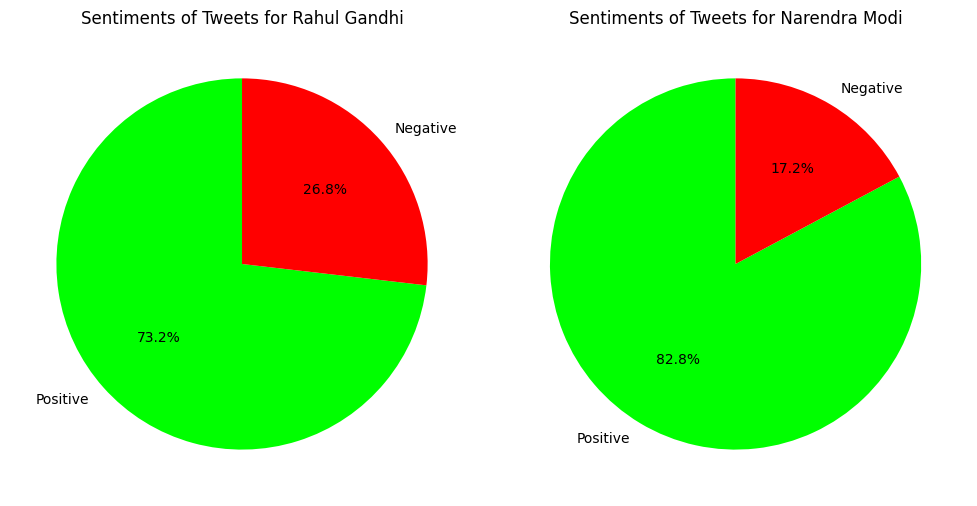

In [ ]:
# Calculate the proportions of positive and negative tweets for Rahul Gandhi and Narendra Modi
rahul_positive_proportion = (df_Rahul['VaderScore'] == 'Pos').mean()
rahul_negative_proportion = (df_Rahul['VaderScore'] == 'Neg').mean()
modi_positive_proportion = (df_Modi['VaderScore'] == 'Pos').mean()
modi_negative_proportion = (df_Modi['VaderScore'] == 'Neg').mean()

# Create a pie chart for Rahul Gandhi's sentiments
plt.figure(figsize=(10, 5))
labels = ['Positive', 'Negative']
sizes = [rahul_positive_proportion, rahul_negative_proportion]
colors = ['#00FF00', '#FF0000']
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiments of Tweets for Rahul Gandhi')

# Create a pie chart for Narendra Modi's sentiments
plt.subplot(1, 2, 2)
sizes = [modi_positive_proportion, modi_negative_proportion]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiments of Tweets for Narendra Modi')

plt.tight_layout()
plt.show()


In [ ]:
////


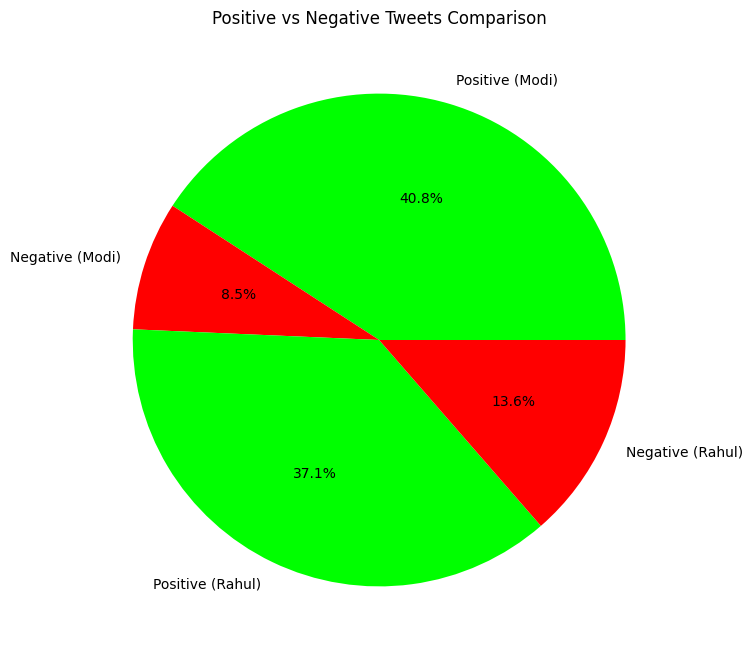

The predicted winning politician based on positive sentiment score is: Narendra Modi


In [ ]:
total_tweets_modi = len(df_Modi)
total_tweets_rahul = len(df_Rahul)

# Calculate the number of positive and negative tweets for Narendra Modi
positive_tweets_modi = (df_Modi['VaderScore'] == 'Pos').sum()
negative_tweets_modi = (df_Modi['VaderScore'] == 'Neg').sum()

# Calculate the number of positive and negative tweets for Rahul Gandhi
positive_tweets_rahul = (df_Rahul['VaderScore'] == 'Pos').sum()
negative_tweets_rahul = (df_Rahul['VaderScore'] == 'Neg').sum()

# Calculate the percentages of positive and negative tweets for each politician
positive_percentage_modi = (positive_tweets_modi / total_tweets_modi) * 100
negative_percentage_modi = (negative_tweets_modi / total_tweets_modi) * 100

positive_percentage_rahul = (positive_tweets_rahul / total_tweets_rahul) * 100
negative_percentage_rahul = (negative_tweets_rahul / total_tweets_rahul) * 100

# Plotting the pie chart for positive and negative tweets of both politicians
labels = ['Positive (Modi)', 'Negative (Modi)', 'Positive (Rahul)', 'Negative (Rahul)']
sizes = [positive_percentage_modi, negative_percentage_modi, positive_percentage_rahul, negative_percentage_rahul]
colors = ['#00FF00', '#FF0000', '#00FF00', '#FF0000']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Positive vs Negative Tweets Comparison')
plt.show()

# Predict the winner for the election based on sentiment analysis
if positive_percentage_modi > positive_percentage_rahul:
    winning_politician = 'Narendra Modi'
elif positive_percentage_modi < positive_percentage_rahul:
    winning_politician = 'Rahul Gandhi'
else:
    winning_politician = 'Tie'

print("The predicted winning politician based on positive sentiment score is:", winning_politician)